In [54]:
import cartopy
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import math

In [56]:
file = 'user_by_country_metrics.json'
with open(file) as f:
    user_data = json.load(f)

dict_api2cartopy = {
    'Tanzania': 'United Republic of Tanzania',
    'United States': 'United States of America',
    'Congo - Kinshasa': 'Democratic Republic of the Congo',
    'Bahamas': 'The Bahamas',
    'Timor-Leste': 'East Timor',
    'C\u00f4te d\u2019Ivoire': 'Ivory Coast',
    'Bosnia & Herzegovina': 'Bosnia and Herzegovina',
    'Serbia': 'Republic of Serbia',
    'Trinidad & Tobago': 'Trinidad and Tobago',
}

for key in dict_api2cartopy:
    user_data[dict_api2cartopy[key]] = user_data.pop(key)


def format_user_stats(value):
    return f"{round(value / 1000, 1):.1f}K"  # Round to one decimal, add 'K' suffix


top_10_countries = sorted(user_data.items(), key=lambda item: item[1], reverse=True)[:10]
top_10_text = "\n".join(f"{country}: {format_user_stats(value)}" for i, (country, value) in enumerate(top_10_countries))

/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_16987/25403892.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


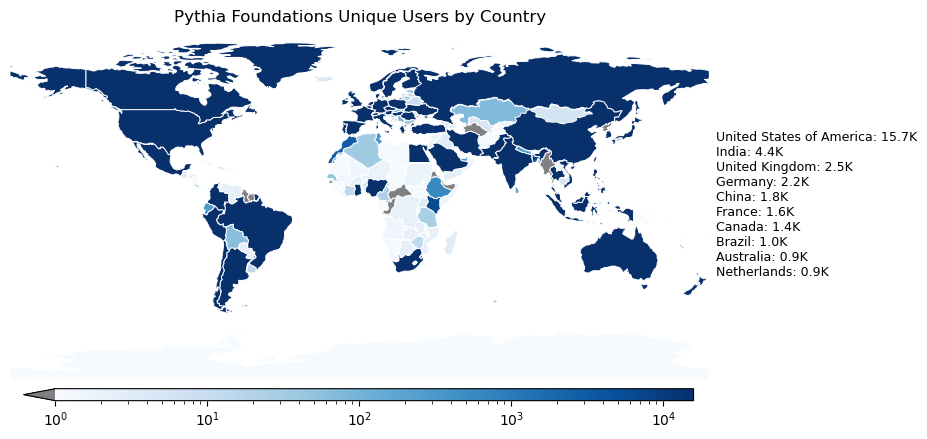

In [80]:
# Set figure size (width, height) in inches
fig = plt.figure(figsize=(10, 4))

ax = plt.axes(projection=cartopy.crs.PlateCarree(), frameon=False)
ax.set_title("Pythia Foundations Unique Users by Country")


shapefile = cartopy.io.shapereader.natural_earth(category='cultural', resolution='110m', name='admin_0_countries')
reader = cartopy.io.shapereader.Reader(shapefile)
countries = reader.records()

# Set normalized colormap
colormap = plt.get_cmap('Blues')
colormap.set_extremes(under='grey')
vmax = int(math.ceil(max(user_data.values()) / 100.0)) * 100
norm = colors.LogNorm(vmin=1, vmax=vmax)
mappable = cm.ScalarMappable(norm=norm, cmap=colormap)

for country in countries:
    country_name = country.attributes["SOVEREIGNT"]
    if country_name in user_data.keys():
        facecolor = colormap(user_data[country_name] / 105)

        ax.add_geometries(
            [country.geometry], cartopy.crs.PlateCarree(), facecolor=facecolor, edgecolor='white', linewidth=0.7
        )
    else:
        ax.add_geometries(
            [country.geometry], cartopy.crs.PlateCarree(), facecolor='grey', edgecolor='white', linewidth=0.7
        )

cax = fig.add_axes([0.1, -0.015, 0.67, 0.03])
fig.colorbar(mappable=mappable, cax=cax, spacing='uniform', orientation='horizontal', extend='min')

props = dict(boxstyle='round', facecolor='white', edgecolor='white')  # bbox features
ax.text(1.01, 0.5, top_10_text, transform=ax.transAxes, fontsize=9, verticalalignment='center', bbox=props)

plt.tight_layout()
plt.savefig('bycountry.png', bbox_inches='tight')
plt.show()

In [88]:
file = 'foundations_page_views.json'
with open(file) as f:
    foundations_page_views = json.load(f)

file = 'cookbooks_page_views.json'
with open(file) as f:
    cookbooks_page_views = json.load(f)

In [197]:
foundations_pages = []
foundations_sorted = {k: v for k, v in sorted(foundations_page_views.items(), key=lambda item: item[1])}
foundations_views = foundations_sorted.values()
for key in foundations_sorted:
    newkey = key.split('—')[0]
    foundations_pages.append(newkey)

cookbooks_pages = []
cookbooks_sorted = {k: v for k, v in sorted(cookbooks_page_views.items(), key=lambda item: item[1])}
cookbooks_views = cookbooks_sorted.values()
for key in cookbooks_page_views:
    newkey = key.split('—')[0]
    cookbooks_pages.insert(0, newkey)

pages = cookbooks_pages + foundations_pages

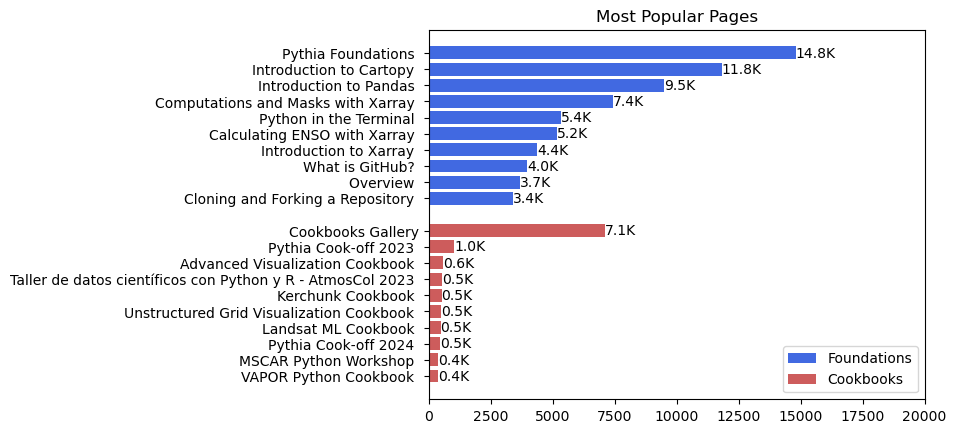

In [214]:
fig, ax = plt.subplots()
plt.title('Most Popular Pages')

views_max = int(math.ceil(max(foundations_views) / 10000.0)) * 10000
ax.set_xlim([0, views_max])

y = np.arange(10)
y2 = np.arange(11, 21)
y3 = np.append(y, y2)

bar1 = ax.barh(y2, foundations_views, align='center', label='Foundations', color='royalblue')
bar2 = ax.barh(y, cookbooks_views, align='center', label='Cookbooks', color='indianred')

ax.set_yticks(y3, labels=pages)


def _format_label(value):
    return f"{round(value / 1000, 1):.1f}K"


ax.bar_label(bar1, fmt=_format_label)
ax.bar_label(bar2, fmt=_format_label)

plt.legend()
plt.savefig('bypage.png', bbox_inches='tight')
plt.show()